# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 6318 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (   0 of 6318) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 6318) |                       | Elapsed Time: 0:00:27 ETA: 5:20:18

  0% (  25 of 6318) |                       | Elapsed Time: 0:00:27 ETA: 1:55:56

  0% (  41 of 6318) |                       | Elapsed Time: 0:00:27 ETA: 1:11:03

  0% (  55 of 6318) |                       | Elapsed Time: 0:00:28 ETA: 0:53:14

  1% (  70 of 6318) |                       | Elapsed Time: 0:00:28 ETA: 0:01:26

  1% (  87 of 6318) |                       | Elapsed Time: 0:00:28 ETA: 0:01:27

  1% ( 103 of 6318) |                       | Elapsed Time: 0:00:28 ETA: 0:01:27

  1% ( 119 of 6318) |                       | Elapsed Time: 0:00:28 ETA: 0:01:27

  2% ( 134 of 6318) |                       | Elapsed Time: 0:00:29 ETA: 0:01:26

  2% ( 149 of 6318) |                       | Elapsed Time: 0:00:29 ETA: 0:01:26

  2% ( 166 of 6318) |                       | Elapsed Time: 0:00:29 ETA: 0:01:25

  2% ( 182 of 6318) |                       | Elapsed Time: 0:00:29 ETA: 0:01:24

  3% ( 198 of 6318) |                       | Elapsed Time: 0:00:30 ETA: 0:01:22

  3% ( 214 of 6318) |                       | Elapsed Time: 0:00:30 ETA: 0:01:22

  3% ( 237 of 6318) |                       | Elapsed Time: 0:00:30 ETA: 0:01:20

  4% ( 253 of 6318) |                       | Elapsed Time: 0:00:30 ETA: 0:01:19

  4% ( 269 of 6318) |                       | Elapsed Time: 0:00:30 ETA: 0:01:19

  4% ( 285 of 6318) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:19

  4% ( 301 of 6318) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:19

  5% ( 324 of 6318) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:18

  5% ( 339 of 6318) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:19

  5% ( 354 of 6318) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:19

  5% ( 370 of 6318) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:20

  6% ( 386 of 6318) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:20

  6% ( 403 of 6318) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:22

  6% ( 417 of 6318) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:21

  6% ( 431 of 6318) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:23

  7% ( 447 of 6318) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:23

  7% ( 463 of 6318) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:22

  7% ( 482 of 6318) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:21

  7% ( 498 of 6318) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:19

  8% ( 514 of 6318) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:18

  8% ( 530 of 6318) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:18

  8% ( 546 of 6318) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:18

  8% ( 561 of 6318) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:18

  9% ( 577 of 6318) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:18

  9% ( 593 of 6318) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:18

  9% ( 609 of 6318) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:19

  9% ( 625 of 6318) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:18

 10% ( 640 of 6318) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:18

 10% ( 656 of 6318) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:17

 10% ( 672 of 6318) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:16

 10% ( 688 of 6318) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:16

 11% ( 704 of 6318) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:15

 11% ( 719 of 6318) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:15

 11% ( 735 of 6318) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:15

 11% ( 750 of 6318) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:16

 12% ( 765 of 6318) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:16

 12% ( 781 of 6318) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:16

 12% ( 798 of 6318) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:16

 12% ( 814 of 6318) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:17

 13% ( 829 of 6318) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:17

 13% ( 845 of 6318) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:16

 13% ( 869 of 6318) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:14

 14% ( 885 of 6318) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:13

 14% ( 901 of 6318) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:12

 14% ( 916 of 6318) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:13

 14% ( 931 of 6318) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:13

 15% ( 948 of 6318) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:15

 15% ( 964 of 6318) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:14

 15% ( 980 of 6318) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:13

 15% ( 996 of 6318) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:10

 16% (1012 of 6318) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:10

 16% (1027 of 6318) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:10

 16% (1043 of 6318) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:10

 16% (1059 of 6318) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:10

 17% (1076 of 6318) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:08

 17% (1094 of 6318) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:07

 17% (1115 of 6318) |####                   | Elapsed Time: 0:00:42 ETA: 0:01:05

 17% (1132 of 6318) |####                   | Elapsed Time: 0:00:42 ETA: 0:01:04

 18% (1148 of 6318) |####                   | Elapsed Time: 0:00:42 ETA: 0:01:04

 18% (1163 of 6318) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:05

 18% (1176 of 6318) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:09

 18% (1193 of 6318) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:13

 19% (1209 of 6318) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:13

 19% (1225 of 6318) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:13

 19% (1241 of 6318) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:11

 19% (1256 of 6318) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:08

 20% (1272 of 6318) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:09

 20% (1287 of 6318) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:09

 20% (1303 of 6318) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:10

 20% (1319 of 6318) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:10

 21% (1334 of 6318) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:09

 21% (1352 of 6318) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:07

 21% (1368 of 6318) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:06

 21% (1385 of 6318) |#####                  | Elapsed Time: 0:00:46 ETA: 0:01:06

 22% (1400 of 6318) |#####                  | Elapsed Time: 0:00:46 ETA: 0:01:05

 22% (1422 of 6318) |#####                  | Elapsed Time: 0:00:46 ETA: 0:01:06

 22% (1438 of 6318) |#####                  | Elapsed Time: 0:00:46 ETA: 0:01:05

 23% (1454 of 6318) |#####                  | Elapsed Time: 0:00:47 ETA: 0:01:06

 23% (1470 of 6318) |#####                  | Elapsed Time: 0:00:47 ETA: 0:01:04

 23% (1486 of 6318) |#####                  | Elapsed Time: 0:00:47 ETA: 0:01:05

 23% (1501 of 6318) |#####                  | Elapsed Time: 0:00:47 ETA: 0:01:04

 24% (1518 of 6318) |#####                  | Elapsed Time: 0:00:47 ETA: 0:01:04

 24% (1534 of 6318) |#####                  | Elapsed Time: 0:00:48 ETA: 0:01:04

 24% (1550 of 6318) |#####                  | Elapsed Time: 0:00:48 ETA: 0:01:03

 24% (1567 of 6318) |#####                  | Elapsed Time: 0:00:48 ETA: 0:01:02

 25% (1588 of 6318) |#####                  | Elapsed Time: 0:00:48 ETA: 0:01:02

 25% (1603 of 6318) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:03

 25% (1620 of 6318) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:02

 25% (1637 of 6318) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:02

 26% (1659 of 6318) |######                 | Elapsed Time: 0:00:49 ETA: 0:01:03

 26% (1676 of 6318) |######                 | Elapsed Time: 0:00:50 ETA: 0:01:01

 26% (1689 of 6318) |######                 | Elapsed Time: 0:00:51 ETA: 0:01:51

 26% (1704 of 6318) |######                 | Elapsed Time: 0:00:51 ETA: 0:01:54

 27% (1719 of 6318) |######                 | Elapsed Time: 0:00:51 ETA: 0:01:54

 27% (1738 of 6318) |######                 | Elapsed Time: 0:00:51 ETA: 0:02:01

 27% (1754 of 6318) |######                 | Elapsed Time: 0:00:51 ETA: 0:01:03

 28% (1770 of 6318) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:03

 28% (1784 of 6318) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:04

 28% (1800 of 6318) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:03

 28% (1817 of 6318) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:05

 28% (1832 of 6318) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:06

 29% (1844 of 6318) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:09

 29% (1860 of 6318) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:09

 29% (1876 of 6318) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:07

 30% (1896 of 6318) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:03

 30% (1912 of 6318) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:02

 30% (1928 of 6318) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:59

 30% (1944 of 6318) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:58

 31% (1960 of 6318) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:57

 31% (1983 of 6318) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:55

 31% (1999 of 6318) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:55

 31% (2015 of 6318) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:55

 32% (2031 of 6318) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:54

 32% (2054 of 6318) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:54

 32% (2070 of 6318) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:54

 33% (2086 of 6318) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:54

 33% (2102 of 6318) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:53

 33% (2118 of 6318) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:54

 33% (2141 of 6318) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:54

 34% (2159 of 6318) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:53

 34% (2177 of 6318) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:52

 34% (2192 of 6318) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:53

 35% (2212 of 6318) |########               | Elapsed Time: 0:00:58 ETA: 0:00:53

 35% (2229 of 6318) |########               | Elapsed Time: 0:00:58 ETA: 0:00:54

 35% (2247 of 6318) |########               | Elapsed Time: 0:00:58 ETA: 0:00:53

 35% (2264 of 6318) |########               | Elapsed Time: 0:00:58 ETA: 0:00:52

 36% (2282 of 6318) |########               | Elapsed Time: 0:00:59 ETA: 0:00:50

 36% (2300 of 6318) |########               | Elapsed Time: 0:00:59 ETA: 0:00:49

 36% (2316 of 6318) |########               | Elapsed Time: 0:00:59 ETA: 0:00:49

 36% (2332 of 6318) |########               | Elapsed Time: 0:00:59 ETA: 0:00:49

 37% (2348 of 6318) |########               | Elapsed Time: 0:00:59 ETA: 0:00:50

 37% (2370 of 6318) |########               | Elapsed Time: 0:01:00 ETA: 0:00:52

 37% (2385 of 6318) |########               | Elapsed Time: 0:01:00 ETA: 0:00:55

 37% (2400 of 6318) |########               | Elapsed Time: 0:01:00 ETA: 0:00:55

 38% (2416 of 6318) |########               | Elapsed Time: 0:01:00 ETA: 0:00:55

 38% (2431 of 6318) |########               | Elapsed Time: 0:01:01 ETA: 0:00:55

 38% (2449 of 6318) |########               | Elapsed Time: 0:01:01 ETA: 0:00:55

 39% (2466 of 6318) |########               | Elapsed Time: 0:01:01 ETA: 0:00:54

 39% (2483 of 6318) |#########              | Elapsed Time: 0:01:01 ETA: 0:00:52

 39% (2500 of 6318) |#########              | Elapsed Time: 0:01:01 ETA: 0:00:50

 39% (2516 of 6318) |#########              | Elapsed Time: 0:01:02 ETA: 0:00:50

 40% (2536 of 6318) |#########              | Elapsed Time: 0:01:02 ETA: 0:00:48

 40% (2552 of 6318) |#########              | Elapsed Time: 0:01:02 ETA: 0:00:48

 40% (2568 of 6318) |#########              | Elapsed Time: 0:01:02 ETA: 0:00:49

 40% (2585 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:48

 41% (2607 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:48

 41% (2624 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:47

 41% (2640 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:47

 42% (2656 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:47

 42% (2673 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:47

 42% (2695 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:45

 42% (2711 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:46

 43% (2727 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:45

 43% (2743 of 6318) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:45

 43% (2765 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:46

 44% (2782 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:45

 44% (2800 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:45

 44% (2817 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:44

 44% (2833 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:43

 45% (2852 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:43

 45% (2868 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:44

 45% (2883 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:45

 45% (2900 of 6318) |##########             | Elapsed Time: 0:01:07 ETA: 0:00:45

 46% (2923 of 6318) |##########             | Elapsed Time: 0:01:07 ETA: 0:00:45

 46% (2940 of 6318) |##########             | Elapsed Time: 0:01:07 ETA: 0:00:43

 46% (2957 of 6318) |##########             | Elapsed Time: 0:01:07 ETA: 0:00:42

 47% (2974 of 6318) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:41

 47% (2992 of 6318) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:41

 47% (3009 of 6318) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:41

 47% (3025 of 6318) |###########            | Elapsed Time: 0:01:08 ETA: 0:00:42

 48% (3040 of 6318) |###########            | Elapsed Time: 0:01:08 ETA: 0:00:43

 48% (3056 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:44

 48% (3072 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:45

 48% (3089 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:43

 49% (3105 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:42

 49% (3121 of 6318) |###########            | Elapsed Time: 0:01:10 ETA: 0:00:42

 49% (3135 of 6318) |###########            | Elapsed Time: 0:01:10 ETA: 0:00:43

 49% (3149 of 6318) |###########            | Elapsed Time: 0:01:10 ETA: 0:00:44

 50% (3166 of 6318) |###########            | Elapsed Time: 0:01:10 ETA: 0:00:46

 50% (3182 of 6318) |###########            | Elapsed Time: 0:01:10 ETA: 0:00:46

 50% (3200 of 6318) |###########            | Elapsed Time: 0:01:11 ETA: 0:00:43

 50% (3216 of 6318) |###########            | Elapsed Time: 0:01:11 ETA: 0:00:42

 51% (3238 of 6318) |###########            | Elapsed Time: 0:01:11 ETA: 0:00:40

 51% (3254 of 6318) |###########            | Elapsed Time: 0:01:11 ETA: 0:00:39

 51% (3271 of 6318) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:39

 52% (3289 of 6318) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:38

 52% (3305 of 6318) |############           | Elapsed Time: 0:01:12 ETA: 0:00:37

 52% (3325 of 6318) |############           | Elapsed Time: 0:01:12 ETA: 0:00:37

 52% (3341 of 6318) |############           | Elapsed Time: 0:01:12 ETA: 0:00:37

 53% (3357 of 6318) |############           | Elapsed Time: 0:01:13 ETA: 0:00:37

 53% (3373 of 6318) |############           | Elapsed Time: 0:01:13 ETA: 0:00:38

 53% (3396 of 6318) |############           | Elapsed Time: 0:01:13 ETA: 0:00:37

 54% (3412 of 6318) |############           | Elapsed Time: 0:01:13 ETA: 0:00:37

 54% (3428 of 6318) |############           | Elapsed Time: 0:01:14 ETA: 0:00:36

 54% (3444 of 6318) |############           | Elapsed Time: 0:01:14 ETA: 0:00:36

 54% (3460 of 6318) |############           | Elapsed Time: 0:01:14 ETA: 0:00:36

 55% (3483 of 6318) |############           | Elapsed Time: 0:01:14 ETA: 0:00:37

 55% (3500 of 6318) |############           | Elapsed Time: 0:01:15 ETA: 0:00:36

 55% (3516 of 6318) |############           | Elapsed Time: 0:01:15 ETA: 0:00:36

 55% (3532 of 6318) |############           | Elapsed Time: 0:01:15 ETA: 0:00:36

 56% (3554 of 6318) |############           | Elapsed Time: 0:01:15 ETA: 0:00:35

 56% (3570 of 6318) |############           | Elapsed Time: 0:01:15 ETA: 0:00:35

 56% (3586 of 6318) |#############          | Elapsed Time: 0:01:16 ETA: 0:00:35

 57% (3603 of 6318) |#############          | Elapsed Time: 0:01:16 ETA: 0:00:34

 57% (3621 of 6318) |#############          | Elapsed Time: 0:01:16 ETA: 0:00:34

 57% (3641 of 6318) |#############          | Elapsed Time: 0:01:16 ETA: 0:00:34

 57% (3659 of 6318) |#############          | Elapsed Time: 0:01:17 ETA: 0:00:34

 58% (3675 of 6318) |#############          | Elapsed Time: 0:01:17 ETA: 0:00:34

 58% (3692 of 6318) |#############          | Elapsed Time: 0:01:17 ETA: 0:00:33

 58% (3712 of 6318) |#############          | Elapsed Time: 0:01:17 ETA: 0:00:33

 58% (3727 of 6318) |#############          | Elapsed Time: 0:01:17 ETA: 0:00:33

 59% (3742 of 6318) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:33

 59% (3760 of 6318) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:33

 59% (3777 of 6318) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:33

 60% (3800 of 6318) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:32

 60% (3817 of 6318) |#############          | Elapsed Time: 0:01:19 ETA: 0:00:31

 60% (3833 of 6318) |#############          | Elapsed Time: 0:01:19 ETA: 0:00:31

 60% (3850 of 6318) |##############         | Elapsed Time: 0:01:19 ETA: 0:00:31

 61% (3870 of 6318) |##############         | Elapsed Time: 0:01:19 ETA: 0:00:31

 61% (3887 of 6318) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:31

 61% (3903 of 6318) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:31

 62% (3918 of 6318) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:31

 62% (3934 of 6318) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:31

 62% (3957 of 6318) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:31

 62% (3973 of 6318) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:31

 63% (3989 of 6318) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:30

 63% (4006 of 6318) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:30

 63% (4028 of 6318) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:29

 64% (4044 of 6318) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:29

 64% (4061 of 6318) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:29

 64% (4078 of 6318) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:28

 64% (4092 of 6318) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:30

 65% (4107 of 6318) |##############         | Elapsed Time: 0:01:23 ETA: 0:00:31

 65% (4120 of 6318) |##############         | Elapsed Time: 0:01:23 ETA: 0:00:32

 65% (4136 of 6318) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:34

 65% (4160 of 6318) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:31

 66% (4178 of 6318) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:29

 66% (4194 of 6318) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:27

 66% (4210 of 6318) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:27

 66% (4226 of 6318) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:27

 67% (4242 of 6318) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:27

 67% (4258 of 6318) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:27

 67% (4273 of 6318) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:27

 67% (4288 of 6318) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:27

 68% (4304 of 6318) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:26

 68% (4321 of 6318) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:26

 68% (4337 of 6318) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:26

 68% (4352 of 6318) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:25

 69% (4368 of 6318) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:25

 69% (4384 of 6318) |###############        | Elapsed Time: 0:01:26 ETA: 0:00:26

 69% (4401 of 6318) |################       | Elapsed Time: 0:01:26 ETA: 0:00:25

 70% (4423 of 6318) |################       | Elapsed Time: 0:01:27 ETA: 0:00:25

 70% (4440 of 6318) |################       | Elapsed Time: 0:01:27 ETA: 0:00:24

 70% (4455 of 6318) |################       | Elapsed Time: 0:01:27 ETA: 0:00:24

 70% (4471 of 6318) |################       | Elapsed Time: 0:01:27 ETA: 0:00:24

 71% (4488 of 6318) |################       | Elapsed Time: 0:01:28 ETA: 0:00:23

 71% (4510 of 6318) |################       | Elapsed Time: 0:01:28 ETA: 0:00:24

 71% (4526 of 6318) |################       | Elapsed Time: 0:01:28 ETA: 0:00:24

 71% (4542 of 6318) |################       | Elapsed Time: 0:01:28 ETA: 0:00:23

 72% (4559 of 6318) |################       | Elapsed Time: 0:01:29 ETA: 0:00:23

 72% (4581 of 6318) |################       | Elapsed Time: 0:01:29 ETA: 0:00:22

 72% (4599 of 6318) |################       | Elapsed Time: 0:01:29 ETA: 0:00:21

 73% (4614 of 6318) |################       | Elapsed Time: 0:01:29 ETA: 0:00:21

 73% (4630 of 6318) |################       | Elapsed Time: 0:01:29 ETA: 0:00:21

 73% (4647 of 6318) |################       | Elapsed Time: 0:01:30 ETA: 0:00:21

 73% (4667 of 6318) |################       | Elapsed Time: 0:01:30 ETA: 0:00:22

 74% (4684 of 6318) |#################      | Elapsed Time: 0:01:30 ETA: 0:00:21

 74% (4700 of 6318) |#################      | Elapsed Time: 0:01:30 ETA: 0:00:21

 74% (4717 of 6318) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:21

 75% (4739 of 6318) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:20

 75% (4753 of 6318) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:20

 75% (4768 of 6318) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:20

 75% (4786 of 6318) |#################      | Elapsed Time: 0:01:31 ETA: 0:00:20

 76% (4802 of 6318) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:20

 76% (4825 of 6318) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:19

 76% (4840 of 6318) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:18

 76% (4857 of 6318) |#################      | Elapsed Time: 0:01:32 ETA: 0:00:18

 77% (4865 of 6318) |#################      | Elapsed Time: 0:01:33 ETA: 0:00:18

 77% (4876 of 6318) |#################      | Elapsed Time: 0:01:34 ETA: 0:00:40

 77% (4889 of 6318) |#################      | Elapsed Time: 0:01:34 ETA: 0:00:44

 77% (4905 of 6318) |#################      | Elapsed Time: 0:01:34 ETA: 0:00:44

 77% (4921 of 6318) |#################      | Elapsed Time: 0:01:34 ETA: 0:00:44

 78% (4936 of 6318) |#################      | Elapsed Time: 0:01:35 ETA: 0:00:20

 78% (4951 of 6318) |##################     | Elapsed Time: 0:01:35 ETA: 0:00:19

 78% (4967 of 6318) |##################     | Elapsed Time: 0:01:35 ETA: 0:00:18

 78% (4984 of 6318) |##################     | Elapsed Time: 0:01:35 ETA: 0:00:18

 79% (4998 of 6318) |##################     | Elapsed Time: 0:01:36 ETA: 0:00:18

 79% (5015 of 6318) |##################     | Elapsed Time: 0:01:36 ETA: 0:00:18

 79% (5029 of 6318) |##################     | Elapsed Time: 0:01:36 ETA: 0:00:18

 79% (5045 of 6318) |##################     | Elapsed Time: 0:01:36 ETA: 0:00:17

 80% (5064 of 6318) |##################     | Elapsed Time: 0:01:36 ETA: 0:00:17

 80% (5081 of 6318) |##################     | Elapsed Time: 0:01:37 ETA: 0:00:16

 80% (5096 of 6318) |##################     | Elapsed Time: 0:01:37 ETA: 0:00:16

 80% (5112 of 6318) |##################     | Elapsed Time: 0:01:37 ETA: 0:00:15

 81% (5134 of 6318) |##################     | Elapsed Time: 0:01:37 ETA: 0:00:15

 81% (5148 of 6318) |##################     | Elapsed Time: 0:01:38 ETA: 0:00:16

 81% (5161 of 6318) |##################     | Elapsed Time: 0:01:38 ETA: 0:00:16

 81% (5177 of 6318) |##################     | Elapsed Time: 0:01:38 ETA: 0:00:16

 82% (5193 of 6318) |##################     | Elapsed Time: 0:01:38 ETA: 0:00:16

 82% (5213 of 6318) |##################     | Elapsed Time: 0:01:38 ETA: 0:00:15

 82% (5230 of 6318) |###################    | Elapsed Time: 0:01:39 ETA: 0:00:14

 83% (5246 of 6318) |###################    | Elapsed Time: 0:01:39 ETA: 0:00:13

 83% (5263 of 6318) |###################    | Elapsed Time: 0:01:39 ETA: 0:00:13

 83% (5279 of 6318) |###################    | Elapsed Time: 0:01:39 ETA: 0:00:13

 83% (5300 of 6318) |###################    | Elapsed Time: 0:01:40 ETA: 0:00:13

 84% (5316 of 6318) |###################    | Elapsed Time: 0:01:40 ETA: 0:00:13

 84% (5331 of 6318) |###################    | Elapsed Time: 0:01:40 ETA: 0:00:13

 84% (5348 of 6318) |###################    | Elapsed Time: 0:01:40 ETA: 0:00:12

 85% (5371 of 6318) |###################    | Elapsed Time: 0:01:41 ETA: 0:00:12

 85% (5386 of 6318) |###################    | Elapsed Time: 0:01:41 ETA: 0:00:12

 85% (5403 of 6318) |###################    | Elapsed Time: 0:01:41 ETA: 0:00:11

 85% (5417 of 6318) |###################    | Elapsed Time: 0:01:41 ETA: 0:00:11

 85% (5432 of 6318) |###################    | Elapsed Time: 0:01:41 ETA: 0:00:11

 86% (5450 of 6318) |###################    | Elapsed Time: 0:01:42 ETA: 0:00:11

 86% (5466 of 6318) |###################    | Elapsed Time: 0:01:42 ETA: 0:00:11

 86% (5482 of 6318) |###################    | Elapsed Time: 0:01:42 ETA: 0:00:11

 87% (5498 of 6318) |####################   | Elapsed Time: 0:01:42 ETA: 0:00:10

 87% (5515 of 6318) |####################   | Elapsed Time: 0:01:42 ETA: 0:00:10

 87% (5537 of 6318) |####################   | Elapsed Time: 0:01:43 ETA: 0:00:10

 87% (5554 of 6318) |####################   | Elapsed Time: 0:01:43 ETA: 0:00:10

 88% (5571 of 6318) |####################   | Elapsed Time: 0:01:43 ETA: 0:00:09

 88% (5586 of 6318) |####################   | Elapsed Time: 0:01:43 ETA: 0:00:09

 88% (5608 of 6318) |####################   | Elapsed Time: 0:01:44 ETA: 0:00:09

 89% (5624 of 6318) |####################   | Elapsed Time: 0:01:44 ETA: 0:00:09

 89% (5640 of 6318) |####################   | Elapsed Time: 0:01:44 ETA: 0:00:09

 89% (5655 of 6318) |####################   | Elapsed Time: 0:01:44 ETA: 0:00:08

 89% (5671 of 6318) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:08

 90% (5687 of 6318) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:08

 90% (5702 of 6318) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:08

 90% (5718 of 6318) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:08

 90% (5735 of 6318) |####################   | Elapsed Time: 0:01:45 ETA: 0:00:07

 91% (5751 of 6318) |####################   | Elapsed Time: 0:01:46 ETA: 0:00:07

 91% (5775 of 6318) |#####################  | Elapsed Time: 0:01:46 ETA: 0:00:06

 91% (5791 of 6318) |#####################  | Elapsed Time: 0:01:46 ETA: 0:00:06

 91% (5808 of 6318) |#####################  | Elapsed Time: 0:01:46 ETA: 0:00:06

 92% (5824 of 6318) |#####################  | Elapsed Time: 0:01:47 ETA: 0:00:06

 92% (5845 of 6318) |#####################  | Elapsed Time: 0:01:47 ETA: 0:00:06

 92% (5860 of 6318) |#####################  | Elapsed Time: 0:01:47 ETA: 0:00:06

 93% (5876 of 6318) |#####################  | Elapsed Time: 0:01:47 ETA: 0:00:05

 93% (5891 of 6318) |#####################  | Elapsed Time: 0:01:47 ETA: 0:00:05

 93% (5908 of 6318) |#####################  | Elapsed Time: 0:01:48 ETA: 0:00:05

 93% (5924 of 6318) |#####################  | Elapsed Time: 0:01:48 ETA: 0:00:05

 94% (5940 of 6318) |#####################  | Elapsed Time: 0:01:48 ETA: 0:00:04

 94% (5957 of 6318) |#####################  | Elapsed Time: 0:01:48 ETA: 0:00:04

 94% (5973 of 6318) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:04

 94% (5988 of 6318) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:04

 95% (6012 of 6318) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:04

 95% (6028 of 6318) |#####################  | Elapsed Time: 0:01:49 ETA: 0:00:03

 95% (6045 of 6318) |###################### | Elapsed Time: 0:01:49 ETA: 0:00:03

 95% (6061 of 6318) |###################### | Elapsed Time: 0:01:50 ETA: 0:00:03

 96% (6082 of 6318) |###################### | Elapsed Time: 0:01:50 ETA: 0:00:03

 96% (6097 of 6318) |###################### | Elapsed Time: 0:01:50 ETA: 0:00:02

 96% (6113 of 6318) |###################### | Elapsed Time: 0:01:50 ETA: 0:00:02

 97% (6130 of 6318) |###################### | Elapsed Time: 0:01:51 ETA: 0:00:02

 97% (6146 of 6318) |###################### | Elapsed Time: 0:01:51 ETA: 0:00:02

 97% (6169 of 6318) |###################### | Elapsed Time: 0:01:51 ETA: 0:00:01

 97% (6186 of 6318) |###################### | Elapsed Time: 0:01:51 ETA: 0:00:01

 98% (6202 of 6318) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:01

 98% (6218 of 6318) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:01

 98% (6240 of 6318) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:01

 99% (6255 of 6318) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:00

 99% (6270 of 6318) |###################### | Elapsed Time: 0:01:52 ETA: 0:00:00

 99% (6286 of 6318) |###################### | Elapsed Time: 0:01:53 ETA: 0:00:00

 99% (6301 of 6318) |###################### | Elapsed Time: 0:01:53 ETA: 0:00:00

100% (6318 of 6318) |######################| Elapsed Time: 0:01:53 Time: 0:01:53


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |


H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | **  |
H_00 | *** | ns. | *   | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | ns. | **  | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | ns. | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | **  | *** | *** | ns. |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | **  | ns. | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


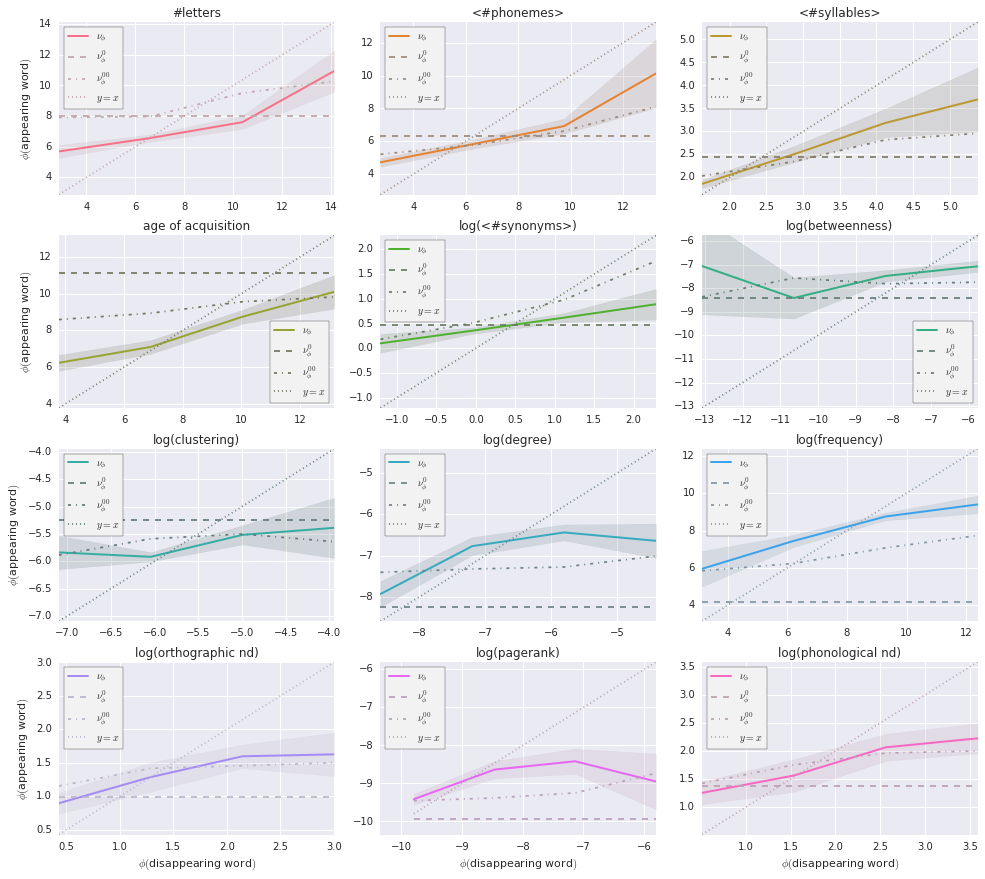

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

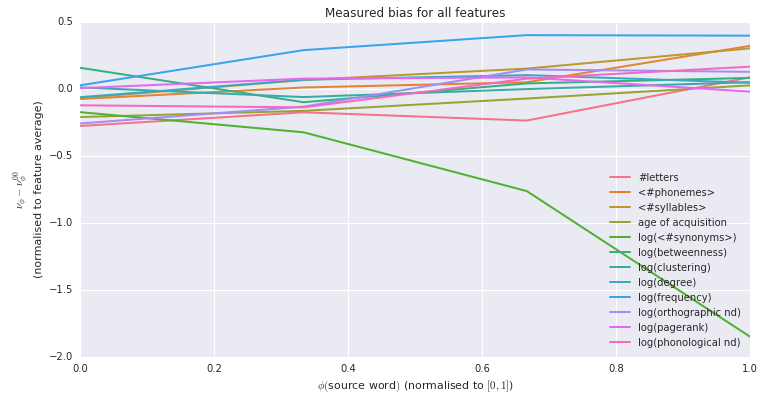

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | **  | ns. | ns. | ns. |


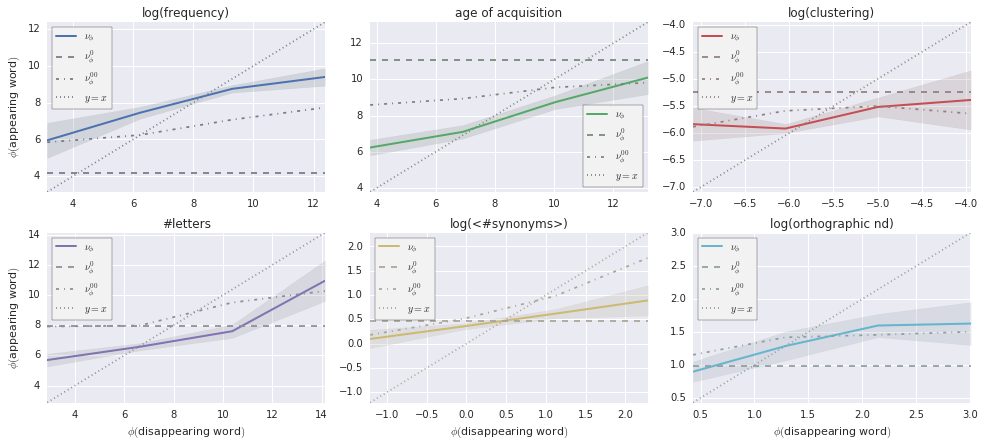

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

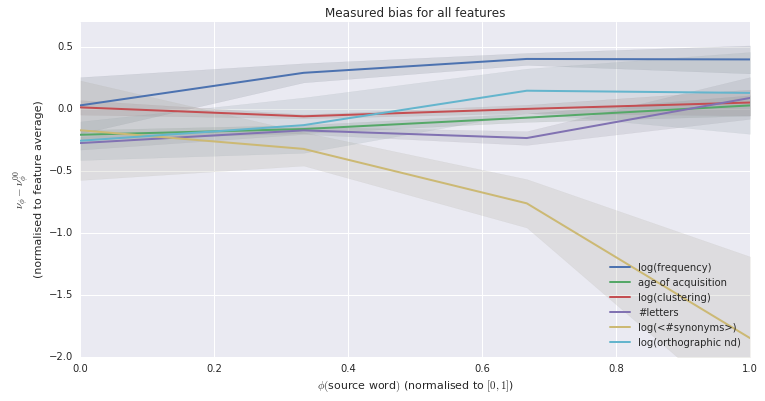

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | *** | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | **  | **  | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | ns. | *** | *   | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | **  | ns. | ns. | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


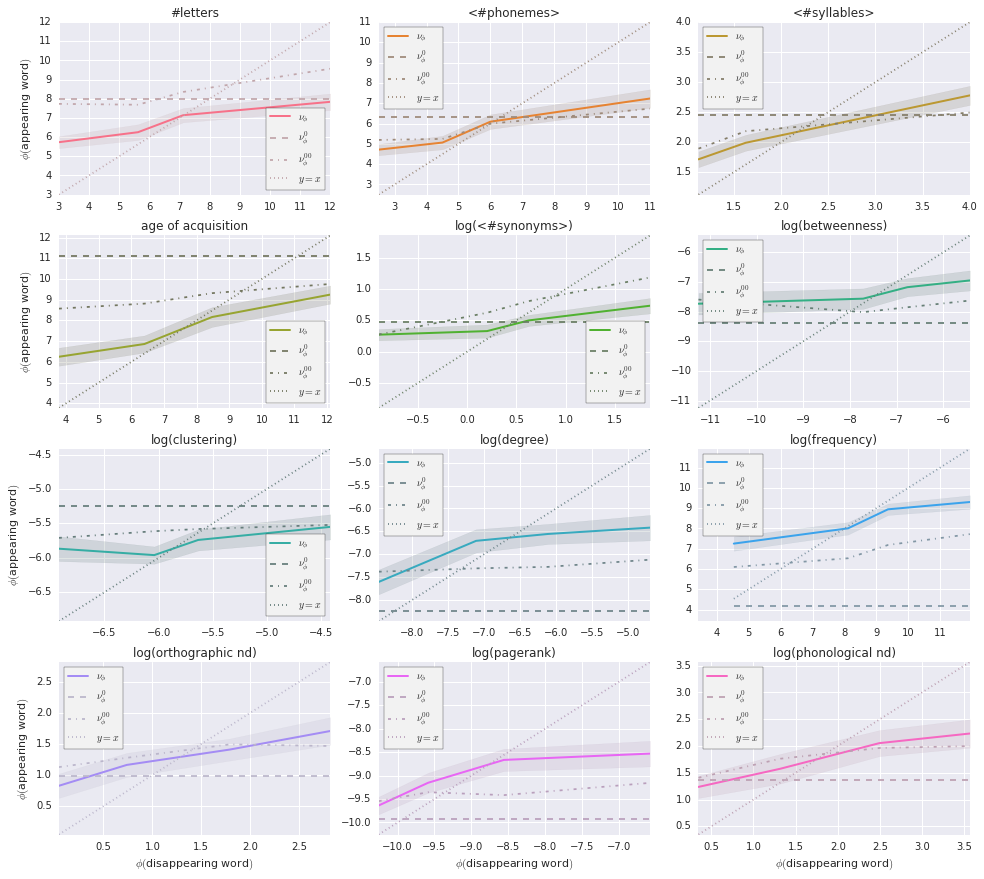

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

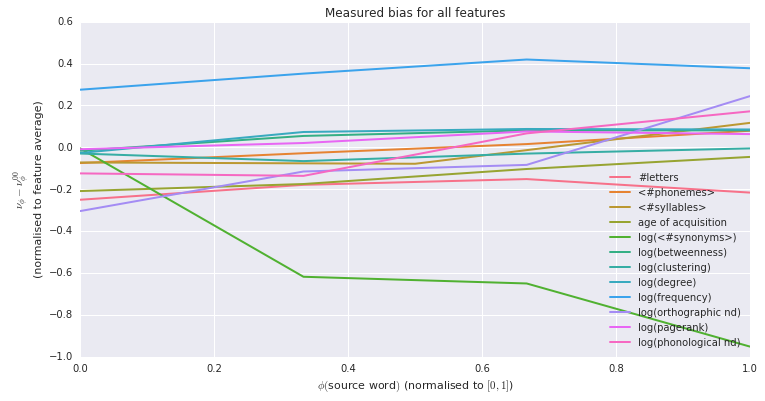

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | ns. | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | **  | ns. | ns. | *   |


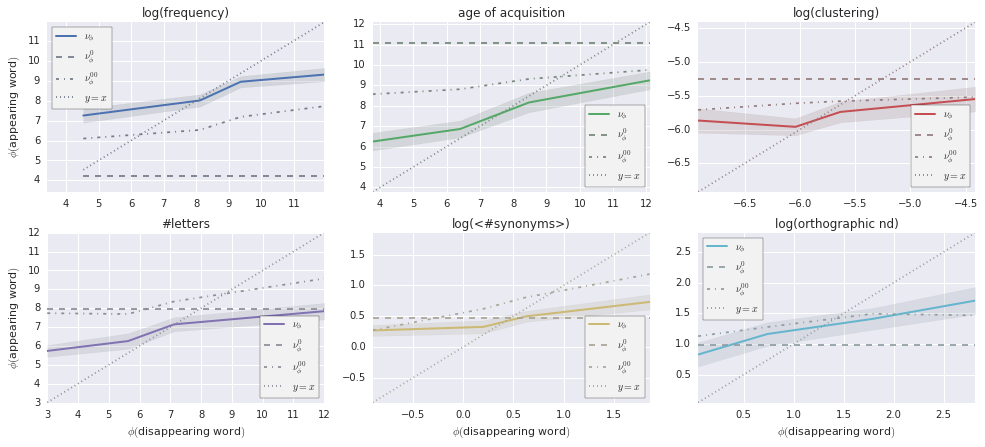

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

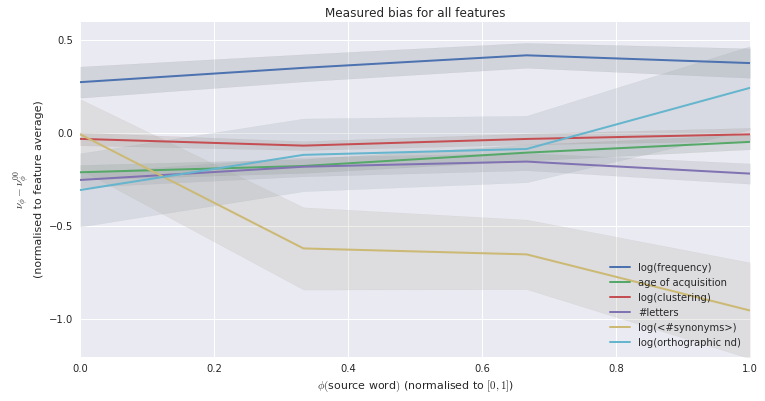

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | **  | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *   | *** |
H_00 | ns. | *   | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *   | *** | **  |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | **  | *   | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | **  | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *   | ns. | ns. |


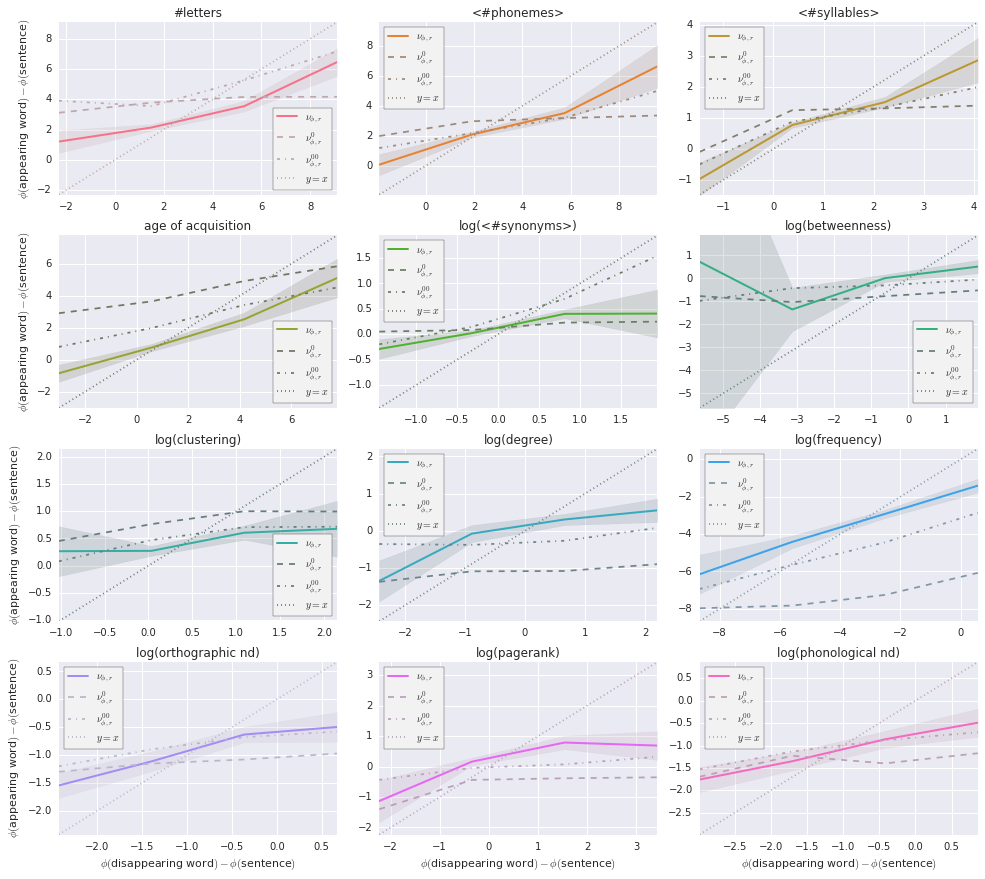

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

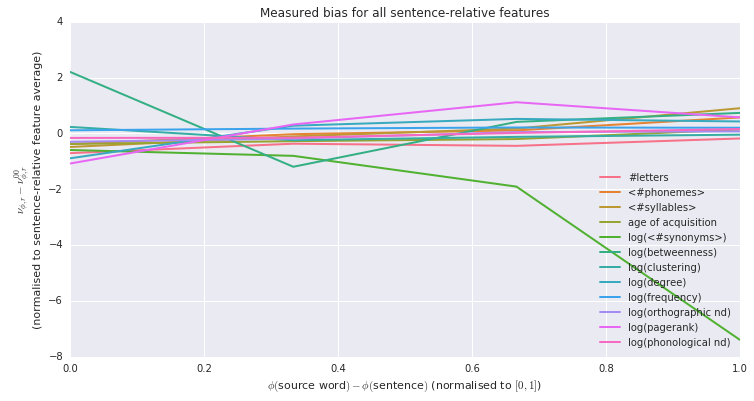

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | ns. | *** | *** |
H_00 | **  | *   | ns. | ns. |


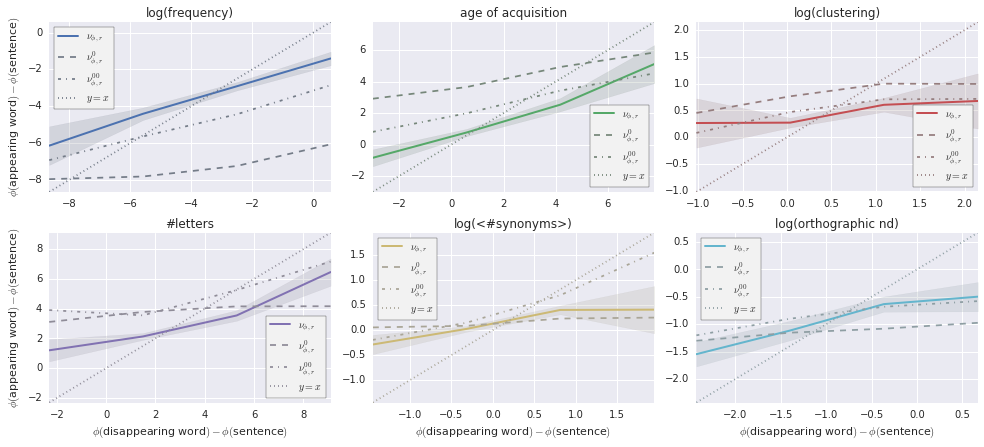

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

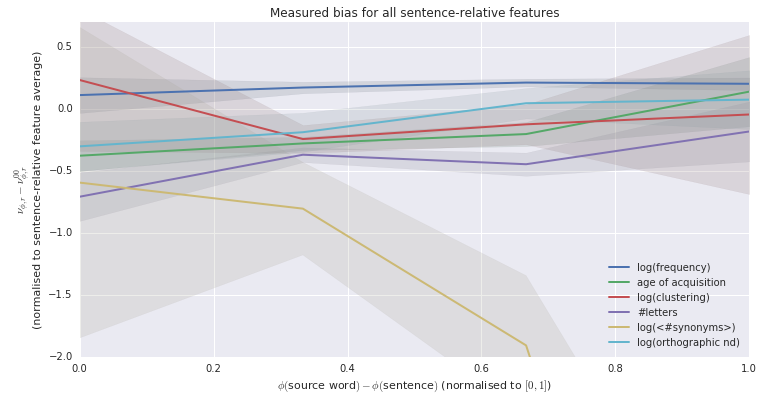

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |


H_00 | ns. | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | **  | ns. | *   | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | **  | ns. | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *   | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | ns. | *   |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | *   | ns. | ns. | ns. |


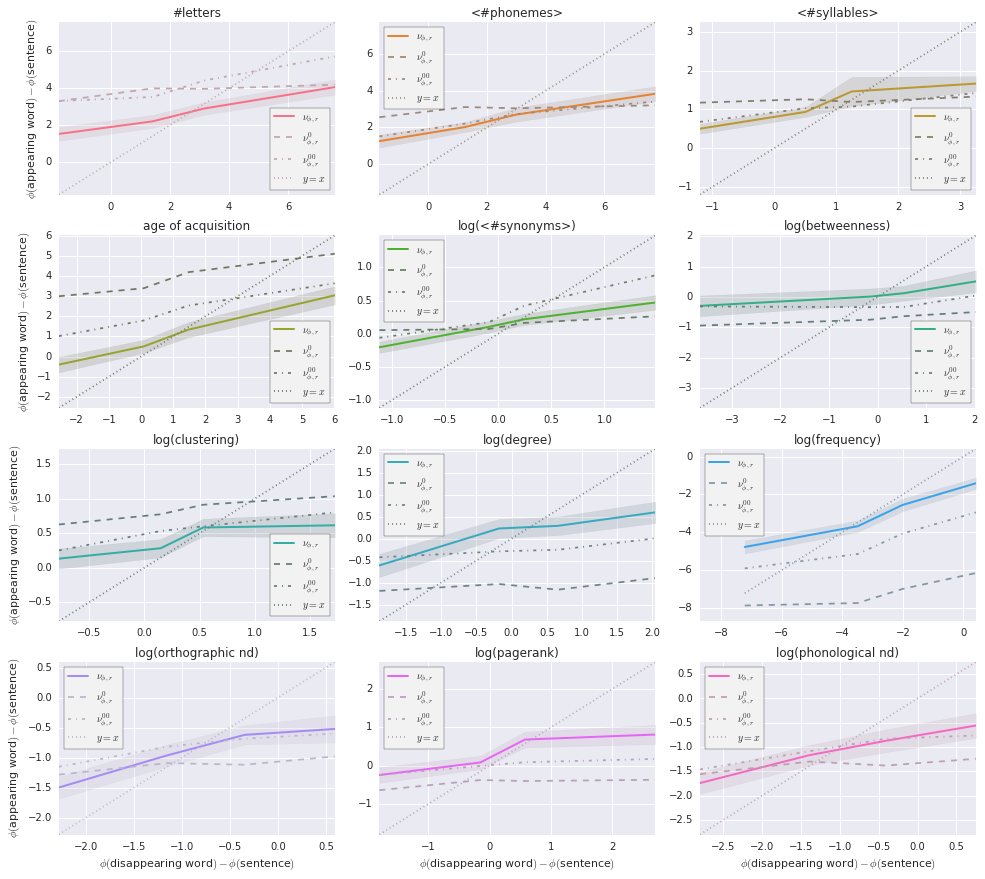

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

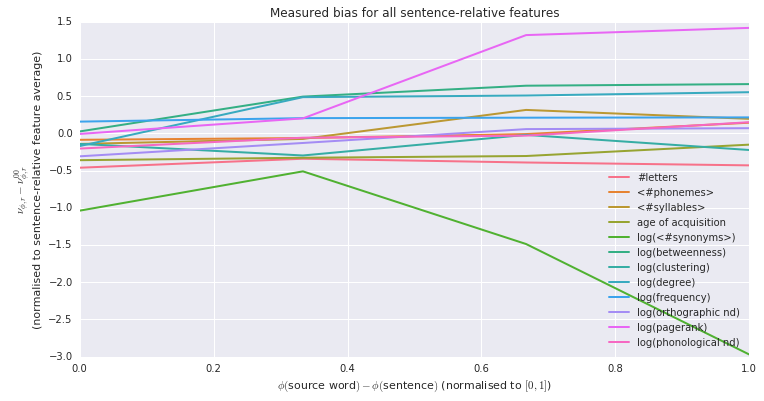

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | ns. | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | **  | ns. | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |


H_00 | *** | ns. | ns. | ns. |


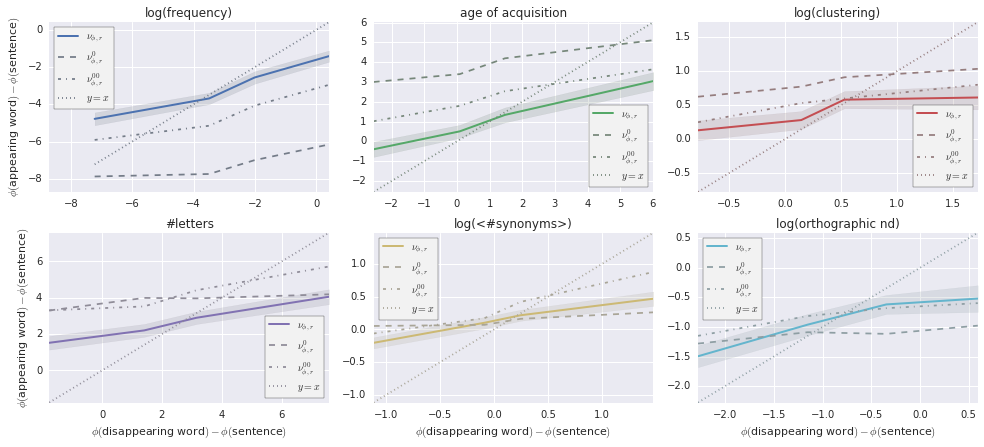

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

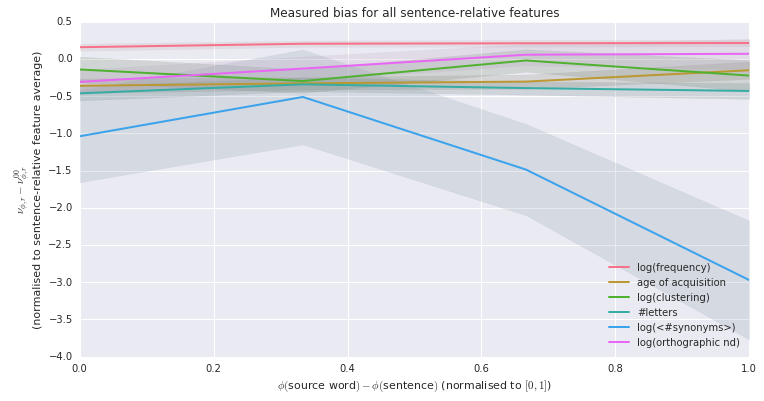

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


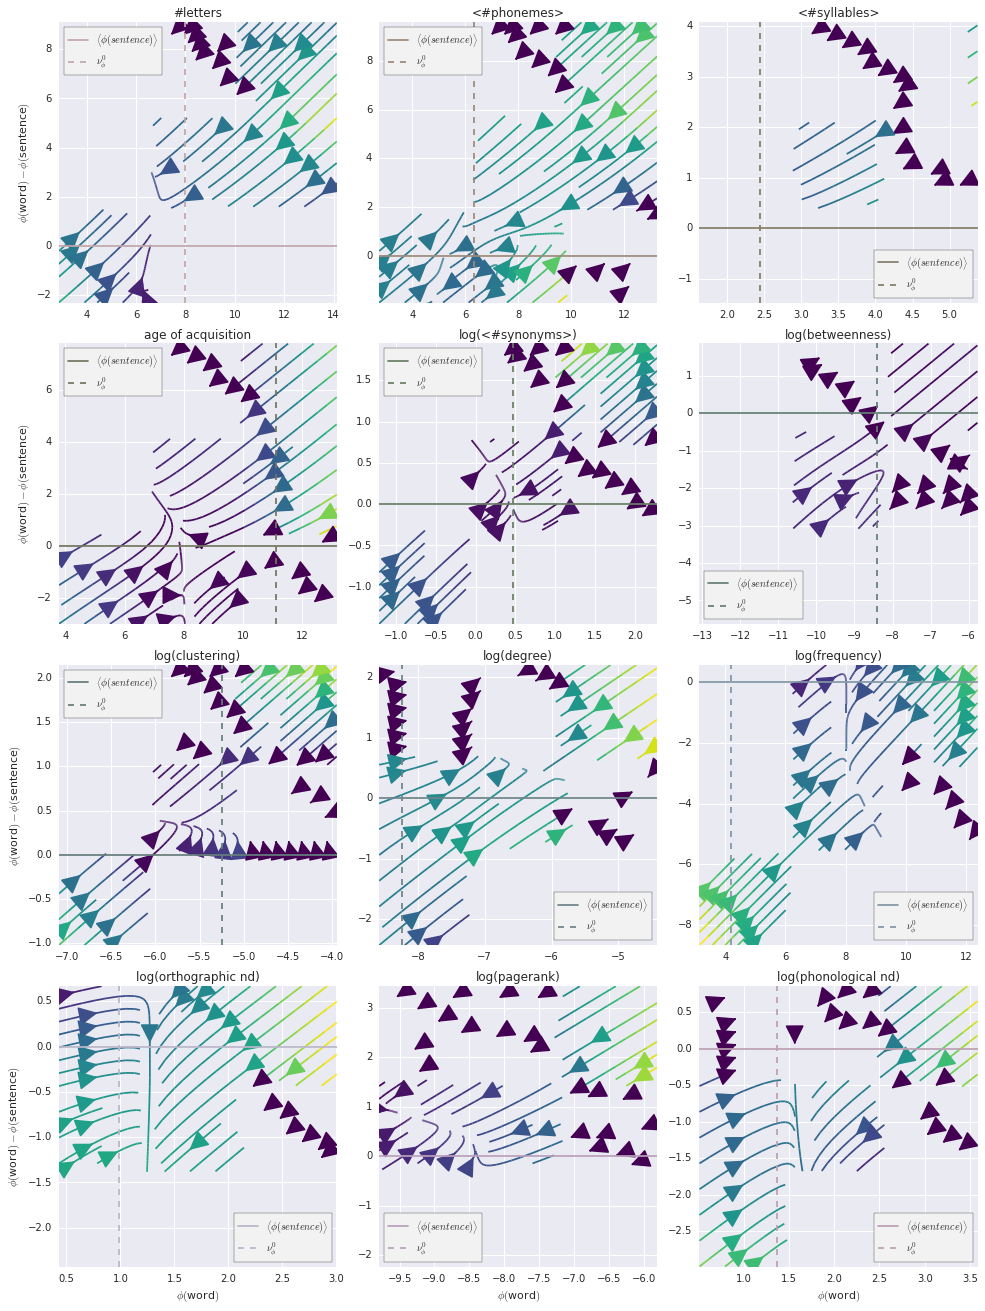

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


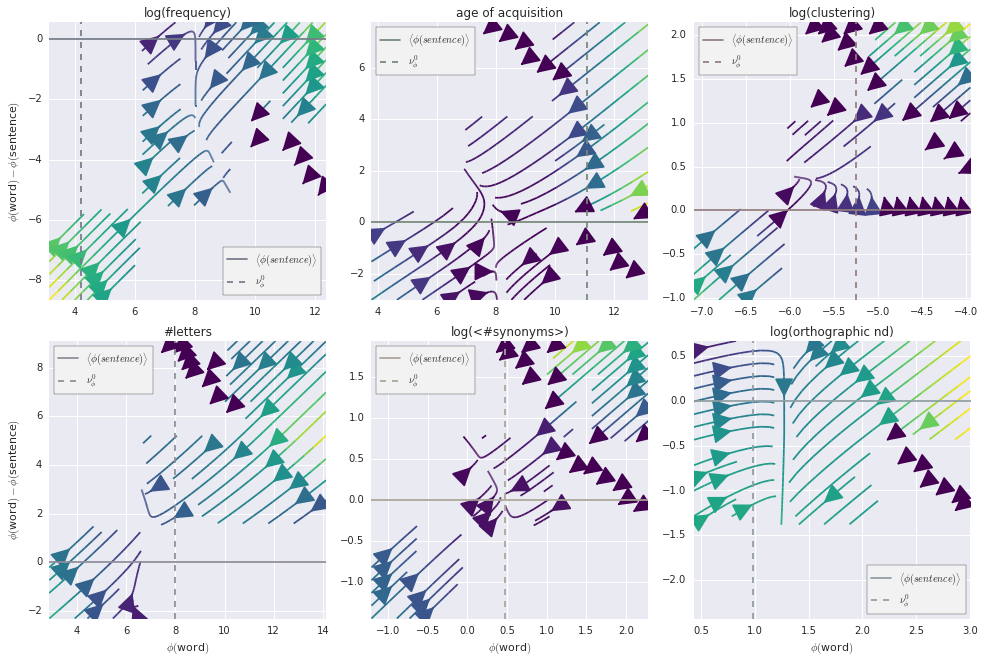

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54601438  0.15938617  0.08145657  0.07174038  0.03516331  0.02791302
  0.02146007  0.01836326  0.01624824  0.01029141  0.00737022]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.492463,0.294978,-0.101583,0.244914,0.251340,-0.418117,0.213284,0.268325,-0.377521,0.280270,-0.153406,0.008792
Component-1,-0.339265,0.351267,-0.093073,0.273678,0.231802,0.420829,-0.161448,0.310660,0.481343,-0.249358,0.173202,-0.025981
Component-2,-0.652011,-0.154437,0.035430,-0.073182,-0.725758,0.046095,0.008336,-0.081155,0.022628,-0.078460,0.014312,0.045194


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 6318) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 6318) |                       | Elapsed Time: 0:00:41 ETA: 8:08:42

  0% (  35 of 6318) |                       | Elapsed Time: 0:00:42 ETA: 2:05:46

  0% (  60 of 6318) |                       | Elapsed Time: 0:00:42 ETA: 1:13:26

  1% (  95 of 6318) |                       | Elapsed Time: 0:00:42 ETA: 0:46:24

  1% ( 117 of 6318) |                       | Elapsed Time: 0:00:42 ETA: 0:00:52

  2% ( 141 of 6318) |                       | Elapsed Time: 0:00:42 ETA: 0:00:50

  2% ( 171 of 6318) |                       | Elapsed Time: 0:00:43 ETA: 0:00:50

  3% ( 197 of 6318) |                       | Elapsed Time: 0:00:43 ETA: 0:00:50

  3% ( 222 of 6318) |                       | Elapsed Time: 0:00:43 ETA: 0:00:50

  3% ( 250 of 6318) |                       | Elapsed Time: 0:00:43 ETA: 0:00:50

  4% ( 275 of 6318) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:49

  4% ( 300 of 6318) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:50

  5% ( 329 of 6318) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:49

  5% ( 342 of 6318) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:55

  5% ( 360 of 6318) |#                      | Elapsed Time: 0:00:44 ETA: 0:01:00

  5% ( 378 of 6318) |#                      | Elapsed Time: 0:00:45 ETA: 0:01:04

  6% ( 410 of 6318) |#                      | Elapsed Time: 0:00:45 ETA: 0:01:02

  6% ( 436 of 6318) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:58

  7% ( 464 of 6318) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:54

  7% ( 484 of 6318) |#                      | Elapsed Time: 0:00:46 ETA: 0:00:53

  7% ( 504 of 6318) |#                      | Elapsed Time: 0:00:46 ETA: 0:00:59

  8% ( 524 of 6318) |#                      | Elapsed Time: 0:00:46 ETA: 0:01:04

  8% ( 543 of 6318) |#                      | Elapsed Time: 0:00:46 ETA: 0:01:03

  8% ( 563 of 6318) |##                     | Elapsed Time: 0:00:46 ETA: 0:01:03

  9% ( 582 of 6318) |##                     | Elapsed Time: 0:00:47 ETA: 0:01:03

  9% ( 602 of 6318) |##                     | Elapsed Time: 0:00:47 ETA: 0:01:03

  9% ( 622 of 6318) |##                     | Elapsed Time: 0:00:47 ETA: 0:01:02

 10% ( 642 of 6318) |##                     | Elapsed Time: 0:00:47 ETA: 0:01:02

 10% ( 662 of 6318) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:02

 10% ( 682 of 6318) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:02

 11% ( 702 of 6318) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:01

 11% ( 721 of 6318) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:01

 11% ( 742 of 6318) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:00

 12% ( 763 of 6318) |##                     | Elapsed Time: 0:00:49 ETA: 0:00:58

 12% ( 790 of 6318) |##                     | Elapsed Time: 0:00:49 ETA: 0:00:57

 12% ( 812 of 6318) |##                     | Elapsed Time: 0:00:49 ETA: 0:00:55

 13% ( 837 of 6318) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:51

 13% ( 869 of 6318) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:47

 14% ( 898 of 6318) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:44

 14% ( 920 of 6318) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:44

 15% ( 948 of 6318) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:45

 15% ( 967 of 6318) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:49

 15% ( 987 of 6318) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:54

 15% (1007 of 6318) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:59

 16% (1027 of 6318) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:57

 16% (1047 of 6318) |###                    | Elapsed Time: 0:00:51 ETA: 0:00:57

 16% (1073 of 6318) |###                    | Elapsed Time: 0:00:52 ETA: 0:00:52

 17% (1106 of 6318) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:45

 18% (1138 of 6318) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:40

 18% (1163 of 6318) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:38

 18% (1185 of 6318) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:40

 19% (1214 of 6318) |####                   | Elapsed Time: 0:00:53 ETA: 0:00:40

 19% (1238 of 6318) |####                   | Elapsed Time: 0:00:53 ETA: 0:00:43

 20% (1264 of 6318) |####                   | Elapsed Time: 0:00:53 ETA: 0:00:47

 20% (1295 of 6318) |####                   | Elapsed Time: 0:00:53 ETA: 0:00:42

 20% (1321 of 6318) |####                   | Elapsed Time: 0:00:54 ETA: 0:00:40

 21% (1357 of 6318) |####                   | Elapsed Time: 0:00:54 ETA: 0:00:39

 21% (1383 of 6318) |#####                  | Elapsed Time: 0:00:54 ETA: 0:00:39

 22% (1409 of 6318) |#####                  | Elapsed Time: 0:00:54 ETA: 0:00:38

 22% (1436 of 6318) |#####                  | Elapsed Time: 0:00:54 ETA: 0:00:38

 23% (1464 of 6318) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:38

 23% (1501 of 6318) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:37

 24% (1525 of 6318) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:37

 24% (1543 of 6318) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:39

 24% (1565 of 6318) |#####                  | Elapsed Time: 0:00:56 ETA: 0:00:41

 25% (1593 of 6318) |#####                  | Elapsed Time: 0:00:56 ETA: 0:00:42

 25% (1618 of 6318) |#####                  | Elapsed Time: 0:00:56 ETA: 0:00:43

 26% (1643 of 6318) |#####                  | Elapsed Time: 0:00:56 ETA: 0:00:41

 26% (1672 of 6318) |######                 | Elapsed Time: 0:00:56 ETA: 0:00:39

 26% (1699 of 6318) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:38

 27% (1738 of 6318) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:37

 27% (1769 of 6318) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:34

 28% (1795 of 6318) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:33

 28% (1817 of 6318) |######                 | Elapsed Time: 0:00:58 ETA: 0:00:35

 29% (1843 of 6318) |######                 | Elapsed Time: 0:00:58 ETA: 0:00:36

 29% (1875 of 6318) |######                 | Elapsed Time: 0:00:58 ETA: 0:00:36

 30% (1912 of 6318) |######                 | Elapsed Time: 0:00:58 ETA: 0:00:35

 30% (1946 of 6318) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:31

 31% (1992 of 6318) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:27

 32% (2026 of 6318) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:26

 32% (2070 of 6318) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:26

 33% (2104 of 6318) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:25

 33% (2133 of 6318) |#######                | Elapsed Time: 0:01:00 ETA: 0:00:26

 34% (2159 of 6318) |#######                | Elapsed Time: 0:01:00 ETA: 0:00:27

 34% (2183 of 6318) |#######                | Elapsed Time: 0:01:00 ETA: 0:00:29

 35% (2212 of 6318) |########               | Elapsed Time: 0:01:00 ETA: 0:00:32

 35% (2243 of 6318) |########               | Elapsed Time: 0:01:01 ETA: 0:00:32

 35% (2271 of 6318) |########               | Elapsed Time: 0:01:01 ETA: 0:00:32

 36% (2307 of 6318) |########               | Elapsed Time: 0:01:01 ETA: 0:00:30

 36% (2333 of 6318) |########               | Elapsed Time: 0:01:01 ETA: 0:00:28

 37% (2370 of 6318) |########               | Elapsed Time: 0:01:02 ETA: 0:00:28

 37% (2396 of 6318) |########               | Elapsed Time: 0:01:02 ETA: 0:00:30

 38% (2422 of 6318) |########               | Elapsed Time: 0:01:02 ETA: 0:00:30

 38% (2449 of 6318) |########               | Elapsed Time: 0:01:02 ETA: 0:00:32

 39% (2480 of 6318) |#########              | Elapsed Time: 0:01:02 ETA: 0:00:31

 39% (2509 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:30

 40% (2540 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:31

 40% (2568 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:30

 41% (2592 of 6318) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:29

 41% (2623 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:29

 41% (2648 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:29

 42% (2668 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:30

 42% (2699 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:30

 43% (2726 of 6318) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:29

 43% (2750 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:30

 44% (2781 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:28

 44% (2810 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:26

 45% (2844 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:25

 45% (2870 of 6318) |##########             | Elapsed Time: 0:01:05 ETA: 0:00:25

 45% (2900 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:24

 46% (2936 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:25

 46% (2960 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:25

 47% (2986 of 6318) |##########             | Elapsed Time: 0:01:06 ETA: 0:00:26

 47% (3008 of 6318) |##########             | Elapsed Time: 0:01:07 ETA: 0:00:28

 47% (3025 of 6318) |###########            | Elapsed Time: 0:01:07 ETA: 0:00:30

 48% (3044 of 6318) |###########            | Elapsed Time: 0:01:07 ETA: 0:00:33

 48% (3067 of 6318) |###########            | Elapsed Time: 0:01:07 ETA: 0:00:33

 48% (3092 of 6318) |###########            | Elapsed Time: 0:01:08 ETA: 0:00:35

 49% (3119 of 6318) |###########            | Elapsed Time: 0:01:08 ETA: 0:00:30

 49% (3131 of 6318) |###########            | Elapsed Time: 0:01:08 ETA: 0:00:31

 49% (3143 of 6318) |###########            | Elapsed Time: 0:01:08 ETA: 0:00:35

 50% (3159 of 6318) |###########            | Elapsed Time: 0:01:08 ETA: 0:00:40

 50% (3179 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:42

 50% (3209 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:36

 51% (3253 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:28

 51% (3282 of 6318) |###########            | Elapsed Time: 0:01:09 ETA: 0:00:24

 52% (3317 of 6318) |############           | Elapsed Time: 0:01:10 ETA: 0:00:21

 52% (3345 of 6318) |############           | Elapsed Time: 0:01:10 ETA: 0:00:22

 53% (3371 of 6318) |############           | Elapsed Time: 0:01:10 ETA: 0:00:22

 53% (3411 of 6318) |############           | Elapsed Time: 0:01:10 ETA: 0:00:21

 54% (3430 of 6318) |############           | Elapsed Time: 0:01:11 ETA: 0:00:23

 54% (3455 of 6318) |############           | Elapsed Time: 0:01:11 ETA: 0:00:22

 55% (3475 of 6318) |############           | Elapsed Time: 0:01:11 ETA: 0:00:24

 55% (3508 of 6318) |############           | Elapsed Time: 0:01:11 ETA: 0:00:23

 55% (3522 of 6318) |############           | Elapsed Time: 0:01:11 ETA: 0:00:25

 56% (3554 of 6318) |############           | Elapsed Time: 0:01:12 ETA: 0:00:23

 56% (3579 of 6318) |#############          | Elapsed Time: 0:01:12 ETA: 0:00:23

 57% (3605 of 6318) |#############          | Elapsed Time: 0:01:12 ETA: 0:00:22

 57% (3633 of 6318) |#############          | Elapsed Time: 0:01:12 ETA: 0:00:23

 57% (3662 of 6318) |#############          | Elapsed Time: 0:01:12 ETA: 0:00:21

 58% (3688 of 6318) |#############          | Elapsed Time: 0:01:13 ETA: 0:00:21

 58% (3724 of 6318) |#############          | Elapsed Time: 0:01:13 ETA: 0:00:20

 59% (3738 of 6318) |#############          | Elapsed Time: 0:01:13 ETA: 0:00:22

 59% (3760 of 6318) |#############          | Elapsed Time: 0:01:13 ETA: 0:00:22

 60% (3791 of 6318) |#############          | Elapsed Time: 0:01:14 ETA: 0:00:22

 60% (3823 of 6318) |#############          | Elapsed Time: 0:01:14 ETA: 0:00:20

 60% (3851 of 6318) |##############         | Elapsed Time: 0:01:14 ETA: 0:00:20

 61% (3881 of 6318) |##############         | Elapsed Time: 0:01:14 ETA: 0:00:19

 61% (3899 of 6318) |##############         | Elapsed Time: 0:01:14 ETA: 0:00:19

 62% (3920 of 6318) |##############         | Elapsed Time: 0:01:15 ETA: 0:00:22

 62% (3949 of 6318) |##############         | Elapsed Time: 0:01:15 ETA: 0:00:24

 62% (3972 of 6318) |##############         | Elapsed Time: 0:01:15 ETA: 0:00:23

 63% (4002 of 6318) |##############         | Elapsed Time: 0:01:15 ETA: 0:00:20

 63% (4028 of 6318) |##############         | Elapsed Time: 0:01:16 ETA: 0:00:20

 64% (4062 of 6318) |##############         | Elapsed Time: 0:01:16 ETA: 0:00:18

 64% (4084 of 6318) |##############         | Elapsed Time: 0:01:16 ETA: 0:00:17

 64% (4094 of 6318) |##############         | Elapsed Time: 0:01:16 ETA: 0:00:20

 65% (4107 of 6318) |##############         | Elapsed Time: 0:01:16 ETA: 0:00:23

 65% (4122 of 6318) |###############        | Elapsed Time: 0:01:17 ETA: 0:00:27

 65% (4146 of 6318) |###############        | Elapsed Time: 0:01:17 ETA: 0:00:31

 66% (4186 of 6318) |###############        | Elapsed Time: 0:01:17 ETA: 0:00:24

 66% (4213 of 6318) |###############        | Elapsed Time: 0:01:17 ETA: 0:00:19

 67% (4241 of 6318) |###############        | Elapsed Time: 0:01:18 ETA: 0:00:16

 67% (4281 of 6318) |###############        | Elapsed Time: 0:01:18 ETA: 0:00:14

 68% (4304 of 6318) |###############        | Elapsed Time: 0:01:18 ETA: 0:00:14

 68% (4325 of 6318) |###############        | Elapsed Time: 0:01:18 ETA: 0:00:15

 68% (4359 of 6318) |###############        | Elapsed Time: 0:01:19 ETA: 0:00:15

 69% (4391 of 6318) |###############        | Elapsed Time: 0:01:19 ETA: 0:00:14

 70% (4423 of 6318) |################       | Elapsed Time: 0:01:19 ETA: 0:00:14

 70% (4446 of 6318) |################       | Elapsed Time: 0:01:19 ETA: 0:00:14

 70% (4479 of 6318) |################       | Elapsed Time: 0:01:19 ETA: 0:00:12

 71% (4513 of 6318) |################       | Elapsed Time: 0:01:20 ETA: 0:00:14

 71% (4538 of 6318) |################       | Elapsed Time: 0:01:20 ETA: 0:00:14

 72% (4568 of 6318) |################       | Elapsed Time: 0:01:20 ETA: 0:00:13

 72% (4598 of 6318) |################       | Elapsed Time: 0:01:20 ETA: 0:00:13

 73% (4623 of 6318) |################       | Elapsed Time: 0:01:21 ETA: 0:00:13

 73% (4660 of 6318) |################       | Elapsed Time: 0:01:21 ETA: 0:00:12

 74% (4691 of 6318) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:11

 74% (4714 of 6318) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:12

 75% (4755 of 6318) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:11

 75% (4789 of 6318) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:10

 76% (4833 of 6318) |#################      | Elapsed Time: 0:01:24 ETA: 0:00:28

 76% (4859 of 6318) |#################      | Elapsed Time: 0:01:24 ETA: 0:00:28

 77% (4877 of 6318) |#################      | Elapsed Time: 0:01:24 ETA: 0:00:29

 77% (4910 of 6318) |#################      | Elapsed Time: 0:01:25 ETA: 0:00:30

 78% (4941 of 6318) |#################      | Elapsed Time: 0:01:25 ETA: 0:00:10

 78% (4957 of 6318) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:12

 78% (4989 of 6318) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:12

 79% (5009 of 6318) |##################     | Elapsed Time: 0:01:26 ETA: 0:00:11

 79% (5033 of 6318) |##################     | Elapsed Time: 0:01:26 ETA: 0:00:12

 80% (5072 of 6318) |##################     | Elapsed Time: 0:01:26 ETA: 0:00:10

 80% (5098 of 6318) |##################     | Elapsed Time: 0:01:26 ETA: 0:00:10

 81% (5134 of 6318) |##################     | Elapsed Time: 0:01:27 ETA: 0:00:09

 81% (5162 of 6318) |##################     | Elapsed Time: 0:01:27 ETA: 0:00:08

 82% (5187 of 6318) |##################     | Elapsed Time: 0:01:27 ETA: 0:00:08

 82% (5225 of 6318) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:08

 83% (5255 of 6318) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:08

 83% (5292 of 6318) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:07

 84% (5320 of 6318) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:07

 84% (5345 of 6318) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:07

 85% (5371 of 6318) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:07

 85% (5398 of 6318) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:07

 85% (5411 of 6318) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:08

 86% (5436 of 6318) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:08

 86% (5460 of 6318) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:08

 86% (5486 of 6318) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:08

 87% (5514 of 6318) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:07

 87% (5539 of 6318) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:06

 88% (5567 of 6318) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:06

 88% (5594 of 6318) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:05

 88% (5619 of 6318) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:05

 89% (5640 of 6318) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:05

 89% (5669 of 6318) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:05

 90% (5700 of 6318) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:05

 90% (5732 of 6318) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:04

 91% (5766 of 6318) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:03

 91% (5792 of 6318) |#####################  | Elapsed Time: 0:01:32 ETA: 0:00:03

 92% (5824 of 6318) |#####################  | Elapsed Time: 0:01:32 ETA: 0:00:03

 92% (5855 of 6318) |#####################  | Elapsed Time: 0:01:32 ETA: 0:00:03

 93% (5876 of 6318) |#####################  | Elapsed Time: 0:01:32 ETA: 0:00:03

 93% (5903 of 6318) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:03

 94% (5940 of 6318) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:02

 94% (5965 of 6318) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:02

 95% (6003 of 6318) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:02

 95% (6047 of 6318) |###################### | Elapsed Time: 0:01:34 ETA: 0:00:01

 96% (6082 of 6318) |###################### | Elapsed Time: 0:01:34 ETA: 0:00:01

 96% (6114 of 6318) |###################### | Elapsed Time: 0:01:34 ETA: 0:00:01

 97% (6139 of 6318) |###################### | Elapsed Time: 0:01:34 ETA: 0:00:01

 97% (6167 of 6318) |###################### | Elapsed Time: 0:01:35 ETA: 0:00:01

 98% (6204 of 6318) |###################### | Elapsed Time: 0:01:35 ETA: 0:00:00

 98% (6230 of 6318) |###################### | Elapsed Time: 0:01:35 ETA: 0:00:00

 98% (6252 of 6318) |###################### | Elapsed Time: 0:01:35 ETA: 0:00:00

 99% (6278 of 6318) |###################### | Elapsed Time: 0:01:36 ETA: 0:00:00

100% (6318 of 6318) |######################| Elapsed Time: 0:01:36 Time: 0:01:36


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | *   | ns. | *   | **  |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |
H_00 | ns. | *** | *** | *   |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |


H_00 | ns. | *** | **  | ns. |


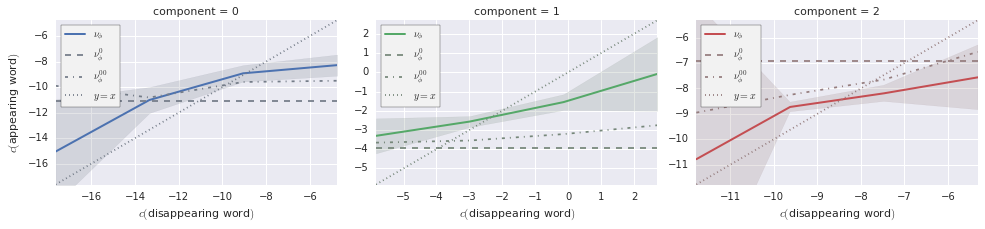

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.64694229  0.21386368]



,aoa,frequency,letters_count
Component-0,-0.732385,0.381288,-0.564120
Component-1,0.326151,-0.530816,-0.782214


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 6318) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  15 of 6318) |                       | Elapsed Time: 0:00:03 ETA: 0:21:55

  0% (  44 of 6318) |                       | Elapsed Time: 0:00:03 ETA: 0:07:56

  1% (  79 of 6318) |                       | Elapsed Time: 0:00:03 ETA: 0:04:54

  1% ( 111 of 6318) |                       | Elapsed Time: 0:00:03 ETA: 0:03:31

  2% ( 158 of 6318) |                       | Elapsed Time: 0:00:04 ETA: 0:00:41

  2% ( 188 of 6318) |                       | Elapsed Time: 0:00:04 ETA: 0:00:40

  3% ( 218 of 6318) |                       | Elapsed Time: 0:00:04 ETA: 0:00:40

  3% ( 252 of 6318) |                       | Elapsed Time: 0:00:04 ETA: 0:00:41

  4% ( 282 of 6318) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:40

  5% ( 316 of 6318) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:40

  5% ( 341 of 6318) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:42

  5% ( 368 of 6318) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:43

  6% ( 411 of 6318) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:42

  6% ( 442 of 6318) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:42

  7% ( 474 of 6318) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:43

  7% ( 500 of 6318) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:42

  8% ( 526 of 6318) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:43

  8% ( 553 of 6318) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:46

  9% ( 579 of 6318) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:45

  9% ( 605 of 6318) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:45

 10% ( 632 of 6318) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:44

 10% ( 659 of 6318) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:44

 10% ( 685 of 6318) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:44

 11% ( 724 of 6318) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:43

 11% ( 754 of 6318) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:42

 12% ( 790 of 6318) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:41

 12% ( 818 of 6318) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:40

 13% ( 869 of 6318) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:37

 14% ( 906 of 6318) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:33

 15% ( 948 of 6318) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:33

 15% ( 977 of 6318) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:33

 15% (1007 of 6318) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:34

 16% (1042 of 6318) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:36

 17% (1077 of 6318) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:35

 17% (1125 of 6318) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:32

 18% (1158 of 6318) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:31

 19% (1204 of 6318) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:31

 19% (1238 of 6318) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:30

 20% (1283 of 6318) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:30

 20% (1319 of 6318) |####                   | Elapsed Time: 0:00:12 ETA: 0:00:30

 21% (1361 of 6318) |####                   | Elapsed Time: 0:00:12 ETA: 0:00:29

 22% (1397 of 6318) |#####                  | Elapsed Time: 0:00:12 ETA: 0:00:29

 22% (1439 of 6318) |#####                  | Elapsed Time: 0:00:12 ETA: 0:00:28

 23% (1472 of 6318) |#####                  | Elapsed Time: 0:00:12 ETA: 0:00:28

 24% (1518 of 6318) |#####                  | Elapsed Time: 0:00:13 ETA: 0:00:28

 24% (1548 of 6318) |#####                  | Elapsed Time: 0:00:13 ETA: 0:00:29

 25% (1580 of 6318) |#####                  | Elapsed Time: 0:00:13 ETA: 0:00:29

 25% (1614 of 6318) |#####                  | Elapsed Time: 0:00:13 ETA: 0:00:29

 26% (1659 of 6318) |######                 | Elapsed Time: 0:00:14 ETA: 0:00:28

 26% (1694 of 6318) |######                 | Elapsed Time: 0:00:14 ETA: 0:00:28

 27% (1738 of 6318) |######                 | Elapsed Time: 0:00:14 ETA: 0:00:27

 28% (1776 of 6318) |######                 | Elapsed Time: 0:00:14 ETA: 0:00:26

 28% (1817 of 6318) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:26

 29% (1853 of 6318) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:26

 30% (1896 of 6318) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:25

 30% (1934 of 6318) |#######                | Elapsed Time: 0:00:15 ETA: 0:00:25

 31% (1975 of 6318) |#######                | Elapsed Time: 0:00:15 ETA: 0:00:25

 31% (2012 of 6318) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:23

 32% (2054 of 6318) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:23

 33% (2092 of 6318) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:22

 33% (2133 of 6318) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:22

 34% (2167 of 6318) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:23

 34% (2194 of 6318) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:24

 35% (2229 of 6318) |########               | Elapsed Time: 0:00:17 ETA: 0:00:25

 35% (2265 of 6318) |########               | Elapsed Time: 0:00:17 ETA: 0:00:25

 36% (2309 of 6318) |########               | Elapsed Time: 0:00:17 ETA: 0:00:24

 37% (2343 of 6318) |########               | Elapsed Time: 0:00:18 ETA: 0:00:23

 37% (2386 of 6318) |########               | Elapsed Time: 0:00:18 ETA: 0:00:23

 38% (2419 of 6318) |########               | Elapsed Time: 0:00:18 ETA: 0:00:23

 39% (2466 of 6318) |########               | Elapsed Time: 0:00:18 ETA: 0:00:23

 39% (2504 of 6318) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:23

 40% (2545 of 6318) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:23

 40% (2580 of 6318) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:22

 41% (2626 of 6318) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:22

 42% (2659 of 6318) |#########              | Elapsed Time: 0:00:20 ETA: 0:00:22

 42% (2703 of 6318) |#########              | Elapsed Time: 0:00:20 ETA: 0:00:21

 43% (2739 of 6318) |#########              | Elapsed Time: 0:00:20 ETA: 0:00:21

 44% (2784 of 6318) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:20

 44% (2819 of 6318) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:21

 45% (2861 of 6318) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:20

 45% (2898 of 6318) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:19

 46% (2940 of 6318) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:19

 47% (2974 of 6318) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:19

 47% (3013 of 6318) |##########             | Elapsed Time: 0:00:22 ETA: 0:00:20

 48% (3041 of 6318) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:21

 48% (3081 of 6318) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:21

 49% (3116 of 6318) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:21

 49% (3138 of 6318) |###########            | Elapsed Time: 0:00:23 ETA: 0:00:23

 50% (3172 of 6318) |###########            | Elapsed Time: 0:00:23 ETA: 0:00:23

 50% (3209 of 6318) |###########            | Elapsed Time: 0:00:23 ETA: 0:00:22

 51% (3256 of 6318) |###########            | Elapsed Time: 0:00:23 ETA: 0:00:20

 52% (3292 of 6318) |###########            | Elapsed Time: 0:00:24 ETA: 0:00:19

 52% (3333 of 6318) |############           | Elapsed Time: 0:00:24 ETA: 0:00:18

 53% (3367 of 6318) |############           | Elapsed Time: 0:00:24 ETA: 0:00:17

 54% (3414 of 6318) |############           | Elapsed Time: 0:00:24 ETA: 0:00:17

 54% (3445 of 6318) |############           | Elapsed Time: 0:00:24 ETA: 0:00:17

 55% (3475 of 6318) |############           | Elapsed Time: 0:00:25 ETA: 0:00:17

 55% (3510 of 6318) |############           | Elapsed Time: 0:00:25 ETA: 0:00:17

 56% (3554 of 6318) |############           | Elapsed Time: 0:00:25 ETA: 0:00:17

 56% (3588 of 6318) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:17

 57% (3633 of 6318) |#############          | Elapsed Time: 0:00:26 ETA: 0:00:16

 58% (3668 of 6318) |#############          | Elapsed Time: 0:00:26 ETA: 0:00:16

 58% (3712 of 6318) |#############          | Elapsed Time: 0:00:26 ETA: 0:00:15

 59% (3738 of 6318) |#############          | Elapsed Time: 0:00:26 ETA: 0:00:16

 59% (3768 of 6318) |#############          | Elapsed Time: 0:00:27 ETA: 0:00:16

 60% (3811 of 6318) |#############          | Elapsed Time: 0:00:27 ETA: 0:00:15

 60% (3847 of 6318) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:15

 61% (3886 of 6318) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:15

 61% (3916 of 6318) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:14

 62% (3949 of 6318) |##############         | Elapsed Time: 0:00:28 ETA: 0:00:14

 63% (3982 of 6318) |##############         | Elapsed Time: 0:00:28 ETA: 0:00:15

 63% (4028 of 6318) |##############         | Elapsed Time: 0:00:28 ETA: 0:00:14

 64% (4066 of 6318) |##############         | Elapsed Time: 0:00:28 ETA: 0:00:13

 64% (4092 of 6318) |##############         | Elapsed Time: 0:00:29 ETA: 0:00:14

 65% (4119 of 6318) |##############         | Elapsed Time: 0:00:29 ETA: 0:00:15

 65% (4152 of 6318) |###############        | Elapsed Time: 0:00:29 ETA: 0:00:15

 66% (4203 of 6318) |###############        | Elapsed Time: 0:00:29 ETA: 0:00:14

 67% (4234 of 6318) |###############        | Elapsed Time: 0:00:30 ETA: 0:00:14

 67% (4285 of 6318) |###############        | Elapsed Time: 0:00:30 ETA: 0:00:12

 68% (4317 of 6318) |###############        | Elapsed Time: 0:00:30 ETA: 0:00:11

 69% (4362 of 6318) |###############        | Elapsed Time: 0:00:30 ETA: 0:00:11

 69% (4399 of 6318) |################       | Elapsed Time: 0:00:31 ETA: 0:00:11

 70% (4438 of 6318) |################       | Elapsed Time: 0:00:31 ETA: 0:00:11

 70% (4474 of 6318) |################       | Elapsed Time: 0:00:31 ETA: 0:00:10

 71% (4518 of 6318) |################       | Elapsed Time: 0:00:31 ETA: 0:00:10

 72% (4551 of 6318) |################       | Elapsed Time: 0:00:31 ETA: 0:00:10

 72% (4600 of 6318) |################       | Elapsed Time: 0:00:32 ETA: 0:00:10

 73% (4633 of 6318) |################       | Elapsed Time: 0:00:32 ETA: 0:00:10

 74% (4679 of 6318) |#################      | Elapsed Time: 0:00:32 ETA: 0:00:09

 74% (4711 of 6318) |#################      | Elapsed Time: 0:00:32 ETA: 0:00:09

 75% (4758 of 6318) |#################      | Elapsed Time: 0:00:33 ETA: 0:00:09

 75% (4796 of 6318) |#################      | Elapsed Time: 0:00:33 ETA: 0:00:08

 76% (4837 of 6318) |#################      | Elapsed Time: 0:00:33 ETA: 0:00:08

 77% (4871 of 6318) |#################      | Elapsed Time: 0:00:33 ETA: 0:00:08

 77% (4915 of 6318) |#################      | Elapsed Time: 0:00:34 ETA: 0:00:07

 78% (4950 of 6318) |##################     | Elapsed Time: 0:00:34 ETA: 0:00:07

 79% (4992 of 6318) |##################     | Elapsed Time: 0:00:34 ETA: 0:00:08

 79% (5023 of 6318) |##################     | Elapsed Time: 0:00:34 ETA: 0:00:08

 80% (5075 of 6318) |##################     | Elapsed Time: 0:00:35 ETA: 0:00:07

 80% (5111 of 6318) |##################     | Elapsed Time: 0:00:35 ETA: 0:00:07

 81% (5153 of 6318) |##################     | Elapsed Time: 0:00:35 ETA: 0:00:06

 82% (5187 of 6318) |##################     | Elapsed Time: 0:00:35 ETA: 0:00:06

 82% (5230 of 6318) |###################    | Elapsed Time: 0:00:35 ETA: 0:00:06

 83% (5267 of 6318) |###################    | Elapsed Time: 0:00:36 ETA: 0:00:06

 84% (5312 of 6318) |###################    | Elapsed Time: 0:00:36 ETA: 0:00:05

 84% (5347 of 6318) |###################    | Elapsed Time: 0:00:36 ETA: 0:00:05

 85% (5388 of 6318) |###################    | Elapsed Time: 0:00:36 ETA: 0:00:05

 85% (5414 of 6318) |###################    | Elapsed Time: 0:00:37 ETA: 0:00:05

 86% (5450 of 6318) |###################    | Elapsed Time: 0:00:37 ETA: 0:00:05

 86% (5484 of 6318) |###################    | Elapsed Time: 0:00:37 ETA: 0:00:05

 87% (5529 of 6318) |####################   | Elapsed Time: 0:00:37 ETA: 0:00:05

 88% (5562 of 6318) |####################   | Elapsed Time: 0:00:37 ETA: 0:00:04

 88% (5608 of 6318) |####################   | Elapsed Time: 0:00:38 ETA: 0:00:04

 89% (5638 of 6318) |####################   | Elapsed Time: 0:00:38 ETA: 0:00:04

 90% (5687 of 6318) |####################   | Elapsed Time: 0:00:38 ETA: 0:00:03

 90% (5725 of 6318) |####################   | Elapsed Time: 0:00:38 ETA: 0:00:03

 91% (5766 of 6318) |####################   | Elapsed Time: 0:00:39 ETA: 0:00:03

 91% (5801 of 6318) |#####################  | Elapsed Time: 0:00:39 ETA: 0:00:02

 92% (5845 of 6318) |#####################  | Elapsed Time: 0:00:39 ETA: 0:00:02

 93% (5876 of 6318) |#####################  | Elapsed Time: 0:00:39 ETA: 0:00:02

 93% (5924 of 6318) |#####################  | Elapsed Time: 0:00:40 ETA: 0:00:02

 94% (5961 of 6318) |#####################  | Elapsed Time: 0:00:40 ETA: 0:00:02

 95% (6003 of 6318) |#####################  | Elapsed Time: 0:00:40 ETA: 0:00:01

 95% (6041 of 6318) |#####################  | Elapsed Time: 0:00:40 ETA: 0:00:01

 96% (6082 of 6318) |###################### | Elapsed Time: 0:00:40 ETA: 0:00:01

 96% (6120 of 6318) |###################### | Elapsed Time: 0:00:41 ETA: 0:00:01

 97% (6161 of 6318) |###################### | Elapsed Time: 0:00:41 ETA: 0:00:00

 98% (6193 of 6318) |###################### | Elapsed Time: 0:00:41 ETA: 0:00:00

 98% (6240 of 6318) |###################### | Elapsed Time: 0:00:41 ETA: 0:00:00

 99% (6274 of 6318) |###################### | Elapsed Time: 0:00:42 ETA: 0:00:00

100% (6318 of 6318) |######################| Elapsed Time: 0:00:42 Time: 0:00:42


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


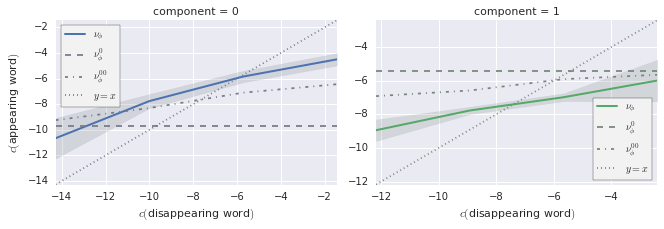

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 698 (cluster-unique) substitutions, but the PCA is in fact computed on 525 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
    * global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global


    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  ns. global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> aoa
    * global -> global


    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global


    * global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 391 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.09853263729254713

intercept                      5.681805
global_aoa                     0.098454
global_clustering              0.169474
global_frequency               0.419654
global_letters_count          -0.035324
global_orthographic_density   -0.105466
global_synonyms_count         -0.173456
dtype: float64

Regressing global frequency with 391 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.12882465936510978

intercept                                              8.718810
global_aoa                                            -0.606622
global_clustering                                      1.369041
global_frequency                                       0.822327
global_letters_count                                   0.094275
global_orthographic_density                            1.383686
global_syno

Regressing rel frequency with 391 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.3052997419684169

intercept                                       -1.366130
rel_aoa                                          0.200335
rel_clustering                                  -0.028015
rel_frequency                                    0.718987
rel_letters_count                               -0.107284
rel_orthographic_density                        -0.745880
rel_synonyms_count                               0.168885
rel_aoa * rel_clustering                        -0.215017
rel_aoa * rel_frequency                         -0.041996
rel_aoa * rel_letters_count                      0.008066
rel_aoa * rel_orthographic_density               0.105147
rel_aoa * rel_synonyms_count                     0.127867
rel_clustering * rel_frequency                  -0.121601
rel_clustering * rel_letters_count               0.033883
rel_clustering * rel_orthographic_density       -0.124748
rel_clustering * 

Regressing rel aoa with 354 measures, no interactions
           ^^^^^^^
R^2 = 0.04149600917525842

intercept                      0.253627
global_aoa                     0.139876
global_clustering             -0.086273
global_frequency              -0.163675
global_letters_count           0.068419
global_orthographic_density    0.133377
global_synonyms_count          0.007264
dtype: float64

Regressing rel aoa with 354 measures, with interactions
           ^^^^^^^
R^2 = 0.12265370608408421

intercept                                             -14.505431
global_aoa                                              2.540140
global_clustering                                      -1.116019
global_frequency                                        0.328564
global_letters_count                                    0.607294
global_orthographic_density                             0.306129
global_synonyms_count                                  -2.695675
global_aoa * global_clustering                 

Regressing global clustering with 316 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.0943291406463459

intercept                     -3.176724
global_aoa                    -0.027766
global_clustering              0.217588
global_frequency              -0.081800
global_letters_count          -0.051657
global_orthographic_density   -0.053771
global_synonyms_count         -0.016606
dtype: float64

Regressing global clustering with 316 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.22022783952943023

intercept                                             -7.386086
global_aoa                                             0.512310
global_clustering                                     -0.113372
global_frequency                                      -0.483373
global_letters_count                                   0.744185
global_orthographic_density                            1.414330
global_synonyms_count                                 -1.762566
global_aoa * gl

Regressing rel clustering with 316 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.21187936657639783

intercept                     -0.708405
global_aoa                    -0.035755
global_clustering             -0.477023
global_frequency              -0.131756
global_letters_count          -0.060689
global_orthographic_density    0.004440
global_synonyms_count         -0.105066
rel_aoa                        0.011962
rel_clustering                 0.748900
rel_frequency                  0.073081
rel_letters_count              0.014803
rel_orthographic_density      -0.057928
rel_synonyms_count             0.083972
dtype: float64

Regressing rel clustering with 316 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.45264251370926756

intercept                                                 19.082660
global_aoa                                                -0.354199
global_clustering                                          4.599595
global_frequency              

Regressing rel letters_count with 391 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.15696526650928355

intercept                   1.172833
rel_aoa                    -0.087302
rel_clustering             -0.009277
rel_frequency              -0.181162
rel_letters_count           0.440010
rel_orthographic_density    0.125737
rel_synonyms_count         -0.259910
dtype: float64

Regressing rel letters_count with 391 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.20483882872841253

intercept                                        0.975009
rel_aoa                                         -0.185556
rel_clustering                                   0.252156
rel_frequency                                   -0.222177
rel_letters_count                                0.595848
rel_orthographic_density                         0.198962
rel_synonyms_count                               0.310477
rel_aoa * rel_clustering                         0.177372
rel_aoa * rel_frequ

Regressing global synonyms_count with 379 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.13729392993648581

intercept                                              1.671486
global_aoa                                            -0.050333
global_clustering                                      0.519805
global_frequency                                      -0.040289
global_letters_count                                   0.179693
global_orthographic_density                            0.153648
global_synonyms_count                                  0.610414
global_aoa * global_clustering                        -0.014634
global_aoa * global_frequency                         -0.009585
global_aoa * global_letters_count                     -0.000918
global_aoa * global_orthographic_density               0.029871
global_aoa * global_synonyms_count                     0.024265
global_clustering * global_frequency                  -0.046233
global_clustering * global_letters_cou

Regressing rel synonyms_count with 379 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.40999867706349624

intercept                                                 8.186277
global_aoa                                                0.500829
global_clustering                                         2.674944
global_frequency                                         -0.386791
global_letters_count                                     -0.347513
global_orthographic_density                               1.582150
global_synonyms_count                                     5.646378
rel_aoa                                                  -0.644274
rel_clustering                                           -2.649892
rel_frequency                                             0.001386
rel_letters_count                                         0.184430
rel_orthographic_density                                 -0.272890
rel_synonyms_count                                       -5.433254
globa

Regressing global orthographic_density with 330 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.33102937438691815

intercept                                                -15.740977
global_aoa                                                -0.982353
global_clustering                                         -2.579401
global_frequency                                           2.044793
global_letters_count                                       1.989682
global_orthographic_density                               -2.916403
global_synonyms_count                                      1.609564
rel_aoa                                                    1.397585
rel_clustering                                             4.800554
rel_frequency                                             -2.527996
rel_letters_count                                         -1.657609
rel_orthographic_density                                   6.048030
rel_synonyms_count                        